<a href="https://colab.research.google.com/github/Advitiya0408/data/blob/main/Copy_of_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px

% matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/imrohit007/Spotify-Data-Analysis/main/spotify_dataset.csv")
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [4]:
#number of times charted by artist

df_numbercharted=df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted=df_numbercharted.reset_index()
df_numbercharted

,Artist,Index,Highest Charting Position,Number of Times Charted
0,Billie Eilish,13908,1136,432
1,Juice WRLD,25342,1755,431
2,Harry Styles,1990,139,364
3,Ed Sheeran,4440,657,314
4,Pop Smoke,17702,2420,308
...,...,...,...,...
711,"KALIM, Ufo361",1143,183,1
712,"Kane Brown, blackbear",231,187,1
713,Kehlani,1191,177,1
714,"Kygo, Donna Summer",897,194,1


In [5]:

px.bar(x='Artist', y='Number of Times Charted', data_frame=df_numbercharted.head(7), title="Top 7 Artists with Highes Number of Times Charted")


In [6]:
#check out correaltion
#clean data first

df=df.fillna('')
df=df.replace(' ', '')
df['Streams']=df['Streams'].str.replace(',','')

#convet all numeric columns to numeric

df[['Highest Charting Position', 'Number of Times Charted', 'Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]] = df[['Highest Charting Position', 'Number of Times Charted', 'Streams','Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       ]].apply(pd.to_numeric)

In [7]:
#let's also separate year from the column "Release date" to be able to analyze its correlations

df['Release Year'] = pd.DatetimeIndex(df['Release Date']).year

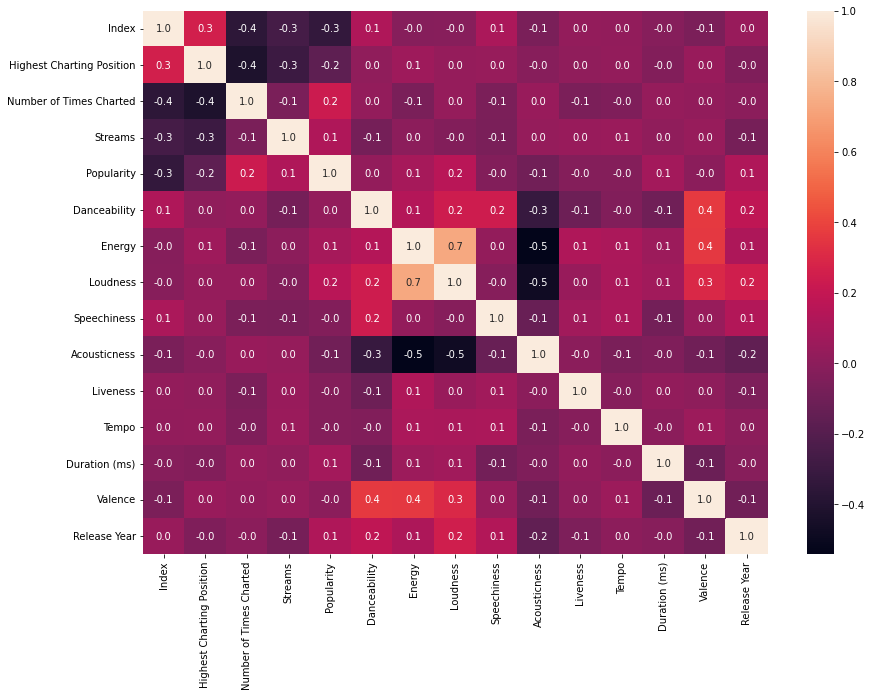

In [8]:
%matplotlib inline

f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [9]:
#danceability

px.line(x='Release Year', y='Danceability', data_frame=df, title="Danceability over the course of the Year")

In [10]:
#Number of Times Charted' correlates with years

dfyear = df.groupby('Release Year').sum().sort_values('Number of Times Charted', ascending=False)
dfyear=dfyear.reset_index()

In [11]:
px.bar(x='Release Year', y='Number of Times Charted', data_frame=dfyear.head(7))

In [12]:
artistbypop = df.groupby('Artist').sum().sort_values('Popularity' ,ascending=False)[:20]
artistbypop=artistbypop.reset_index()

In [13]:
px.bar(x='Artist', y='Popularity', data_frame=artistbypop)

In [14]:
#most popular geners

df['Genre']=df['Genre'].astype(str)
df["Genre"][df["Genre"] == "[]"] = np.nan
df["Genre"] = df["Genre"].fillna(0)
#here we get rid of useless symbols to be able to separate genres
df.Genre=df.Genre.str.replace("[", "")
df.Genre=df.Genre.str.replace("]", "")
df.Genre=df.Genre.str.replace("'", "")
#now we devide genre strings by comma
df["Genre"] = df["Genre"].str.split(",")
#next command separates rows based on genres, so for each song that is marked with several genres, 
#now we'll have multiple rows with one genre for each row
df=df.explode('Genre')

df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Release Year
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,2017.0
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,2021.0
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,2021.0
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,post-teen pop,...,0.523,-4.333,0.0300,0.1840,0.1320,104.988,217307.0,0.394,D,2018.0
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.550,-7.026,0.0587,0.2490,0.1820,154.064,152784.0,0.881,F,2019.0
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,funk carioca,...,0.550,-7.026,0.0587,0.2490,0.1820,154.064,152784.0,0.881,F,2019.0
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],4595450,Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,pop,...,0.603,-7.176,0.0640,0.4330,0.0862,205.272,221307.0,0.422,G,2019.0


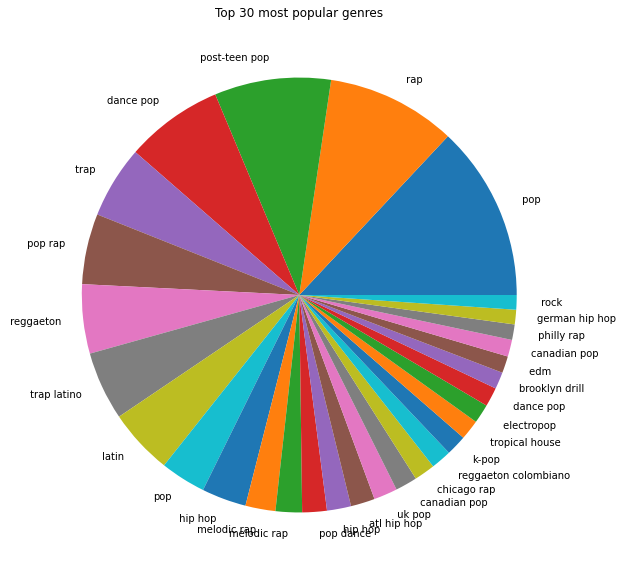

In [15]:
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df.Genre.value_counts()[:30].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 30 most popular genres")
plt.show()